# Raichle1983Model for Image-Derived Input Functions and Twilite Data

## Setup

In [1]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Boxcar import Boxcar
from RadialArtery import RadialArtery
from Raichle1983Model import Raichle1983Model

In [2]:
# define data & models
petdir = os.path.join(os.getenv("SINGULARITY_HOME"), "CCIR_01211", "derivatives", "sub-108293", "ses-20210421152358", "pet")
idif = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
#idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-ho_proc-MipIdif_idif.nii.gz")
#twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-ho_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
kern = os.path.join(petdir, "kernel_hct=46.8.nii.gz")
pet = os.path.join(petdir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

mm_twil = Raichle1983Model(twil, 
                     pet,
                     truths=[0.00790, 0.898, 0.0218, 0, 0, 0.05],
                     nlive=100,
                     tag="playground-for-R1983M")
mm_idif = Raichle1983Model(idif, 
                     pet,
                     truths=[0.00790, 0.898, 0.0218, 0, 0, 0.05],
                     nlive=100,
                     tag="playground-for-R1983M")

RadialArtery: found data for tracer ho
{'fqfp': '/Users/jjlee/Singularity/CCIR_01211/derivatives/sub-108293/ses-20210421152358/pet/sub-108293_ses-20210421152358_trc-ho_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal',
 'halflife': 122.2416,
 'img': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.61289497e+02, 2.22605287e+03, 4.83712148e+03, 9.28500264e+03,
       1.82915046e+04, 3.56935079e+04, 6.57717370e+04, 1.12169496e+05,
       1.76625086e+05, 2.57859624e+05, 3.50996280e+05, 4.47798373e+05,
       5.37806828e+05, 6.10186885e+05, 6.55850192e+05, 6.69297021e+05,
       6.49680118e+05, 6.00814854e+05, 5.30174183e+05, 4.47196589e+05,
       3.61399487e+05, 2.80783139e+05, 2.10853156e+05, 1.54359629e+05,
       1.11638170e+05, 8.13100354e+04, 6.10757509e+04, 4.83970369e+04,
       4.

/Users/jjlee/PycharmProjects/dynesty/idif2024/TCModel.py:233: UserWarning: Raichle1983Model.raichle_ks_measurement: /Users/jjlee/Singularity/CCIR_01211/derivatives/sub-108293/**/*-createNiftiMovingAvgFrames-schaeffer-Raichle1983Artery-playground-for-R1983M-qm.nii.gz failed to produce matches
  warnings.warn(
/Users/jjlee/PycharmProjects/dynesty/idif2024/TCModel.py:236: UserWarning: Raichle1983Model.raichle_ks_measurement: self.ARTERY == <RadialArtery.RadialArtery object at 0x16a4a7880>, but proceeding to use Boxcar data 
  warnings.warn(


## Inspect Raichle1983Model twil

In [3]:
v = mm_twil.truths
pprint("===================================== v ======================================")
pprint(v)

data = mm_twil.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.0079, 0.898, 0.0218, 0, 0, 0.05]
'==================================== data ===================================='
{'halflife': 122.2416,
 'inputFuncInterp': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.02493129e-02, 4.06483862e-02, 8.83272743e-02, 1.69546905e-01,
       3.34008304e-01, 6.51774050e-01, 1.20101144e+00, 2.04824831e+00,
       3.22522650e+00, 4.70859330e+00, 6.40929628e+00, 8.17693124e+00,
       9.82051234e+00, 1.11421937e+01, 1.19760192e+01, 1.22215623e+01,
       1.18633518e+01, 1.09710576e+01, 9.68113797e+00, 8.16594249e+00,
       6.59926192e+00, 5.12718347e+00, 3.85024122e+00, 2.81865265e+00,
       2.03854612e+00, 1.48474539e+00, 1.11526134e+00, 8.83744263e-01,
       7.47961218e-01, 6.74064581e-01, 6.37531738

In [4]:
pprint("============================== mm_twil.data2t(data) ===============================")
pprint(mm_twil.data2t(data))
pprint("============================= mm_twil.data2taus(data) =============================")
pprint(mm_twil.data2taus(data))
pprint("=========================== mm_twil.data2timesMid(data) ===========================")
pprint(mm_twil.data2timesMid(data))
pprint("================================== mm_twil.fqfp ===================================")
pprint(mm_twil.fqfp)
pprint("========================== mm_twil.input_function() =========================")
pprint(mm_twil.input_function())
pprint("================================= mm_twil.labels ==================================")
pprint(mm_twil.labels)
pprint("====================== mm_twil.load_nii(mm_twil.fqfp + '.nii.gz') ======================")
pprint(mm_twil.load_nii(mm_twil.fqfp + ".nii.gz"))
pprint("=============================== mm_twil.loglike(v) ================================")
pprint(mm_twil.loglike(v))
pprint("================================== mm_twil.ndim ===================================")
pprint(mm_twil.ndim)
pprint("========================= mm_twil.parse_halflife(mm_twil.fqfp) =========================")
pprint(mm_twil.parse_halflife(mm_twil.fqfp))
pprint("========================= mm_twil.parse_isotope(mm_twil.fqfp) ==========================")
pprint(mm_twil.parse_isotope(mm_twil.fqfp))
pprint("================================== mm_twil.sigma ==================================")
pprint(mm_twil.sigma)
pprint("============================ mm_twil.signalmodel(data) ============================")
pprint(mm_twil.signalmodel(data))

('============================== mm_twil.data2t(data) '
 '===============================')
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118.])
('============================= mm_twil.data2taus(data) '
 '=============================')
array([10., 10., 10., 10

## Plot Raichle1983Model twil

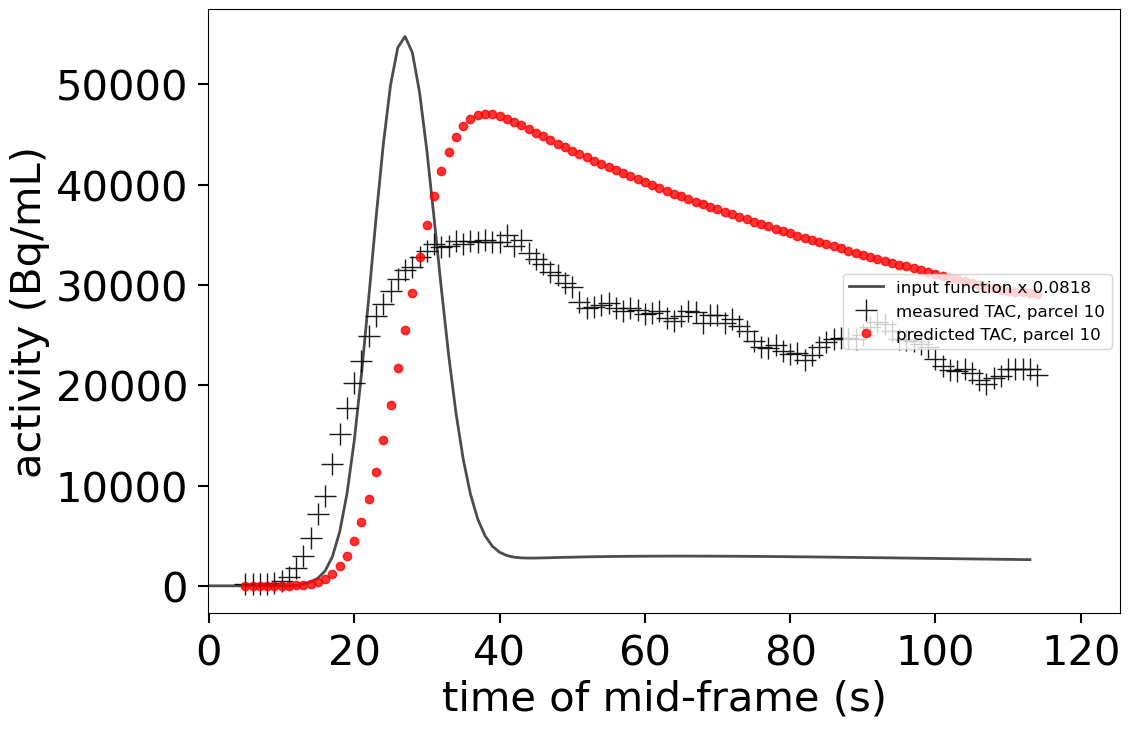

In [5]:
mm_twil.plot_truths(parc_index=10)

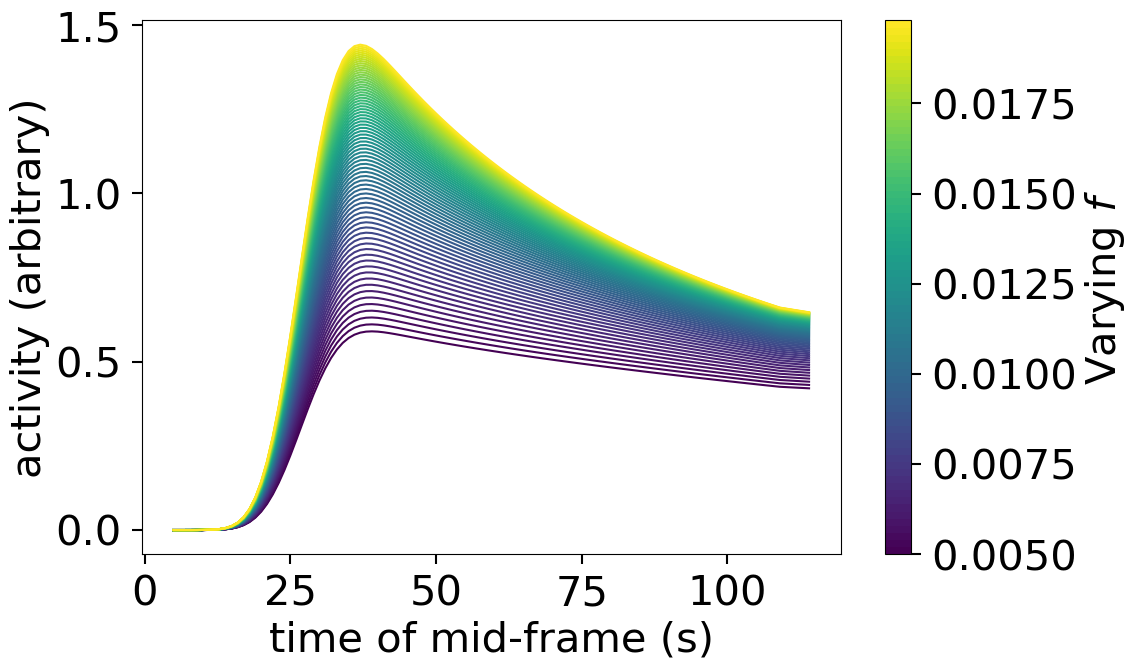

In [6]:
mm_twil.plot_variations(0, 0.005, 0.02 , mm_twil.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 14451 | batch: 24 | bound: 11 | nc: 1 | ncall: 766818 | eff(%):  1.870 | loglstar: 262.516 < 266.118 < 265.118 | logz: 247.273 +/-  0.131 | stop:  0.965                                        

Parameter 0: 0.011 [0.005, 0.017]
Parameter 1: 0.674 [0.643, 0.710]
Parameter 2: 0.007 [0.006, 0.015]
Parameter 3: 5.082 [0.278, 11.362]
Parameter 4: -12.451 [-18.816, -7.592]
Parameter 5: 0.022 [0.019, 0.025]
Parameter 0: 0.011 [0.005, 0.017]
Parameter 1: 0.674 [0.643, 0.710]
Parameter 2: 0.007 [0.006, 0.015]
Parameter 3: 5.082 [0.278, 11.362]
Parameter 4: -12.451 [-18.816, -7.592]
Parameter 5: 0.022 [0.019, 0.025]


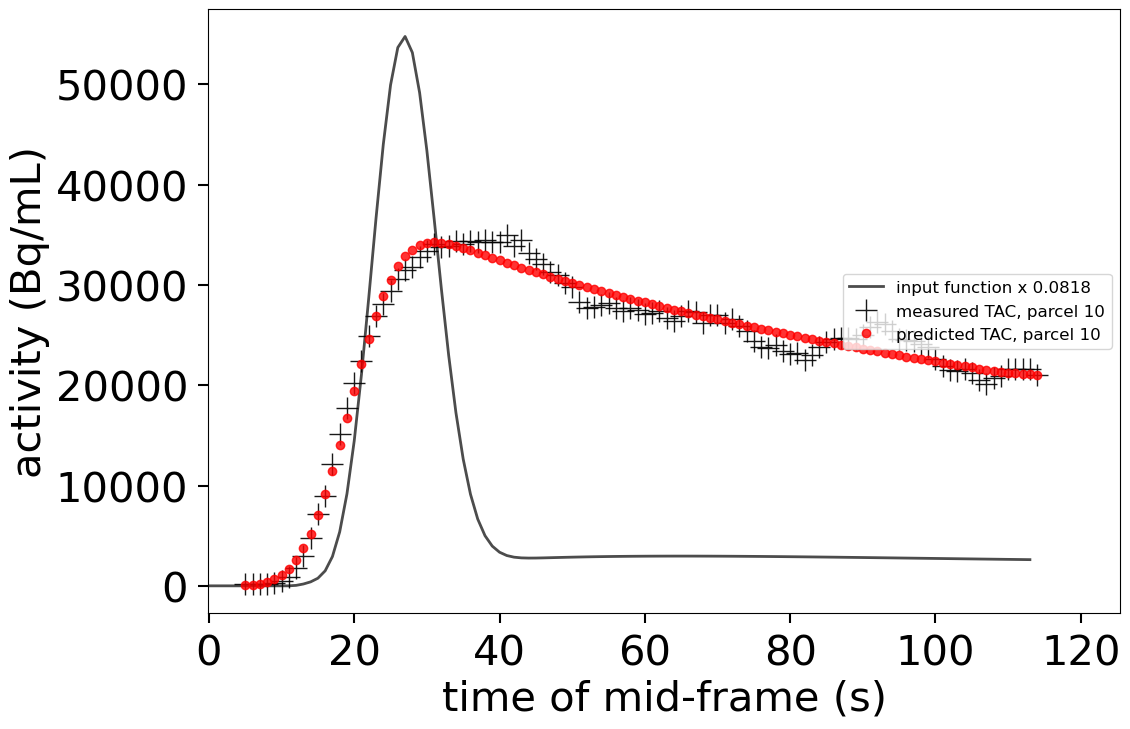

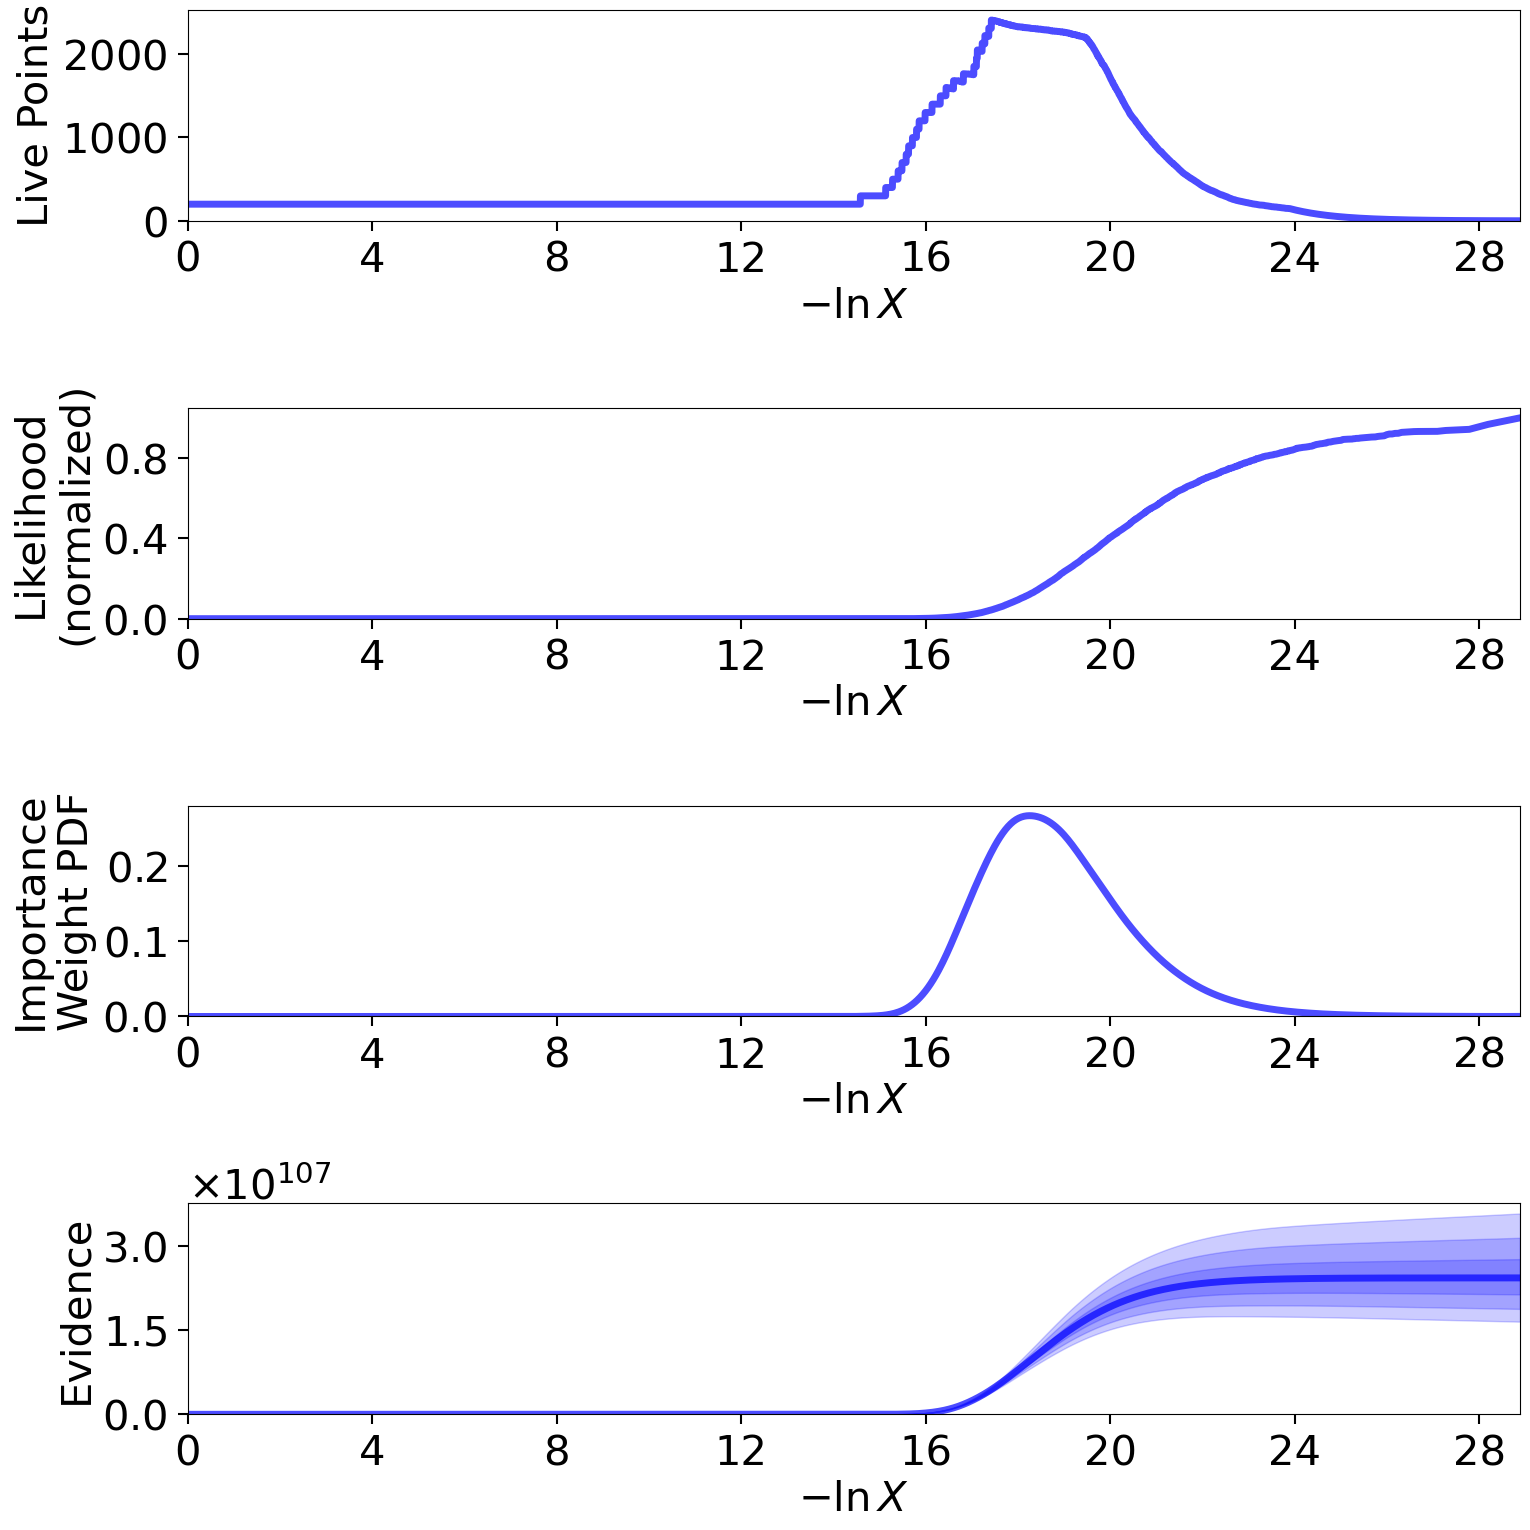

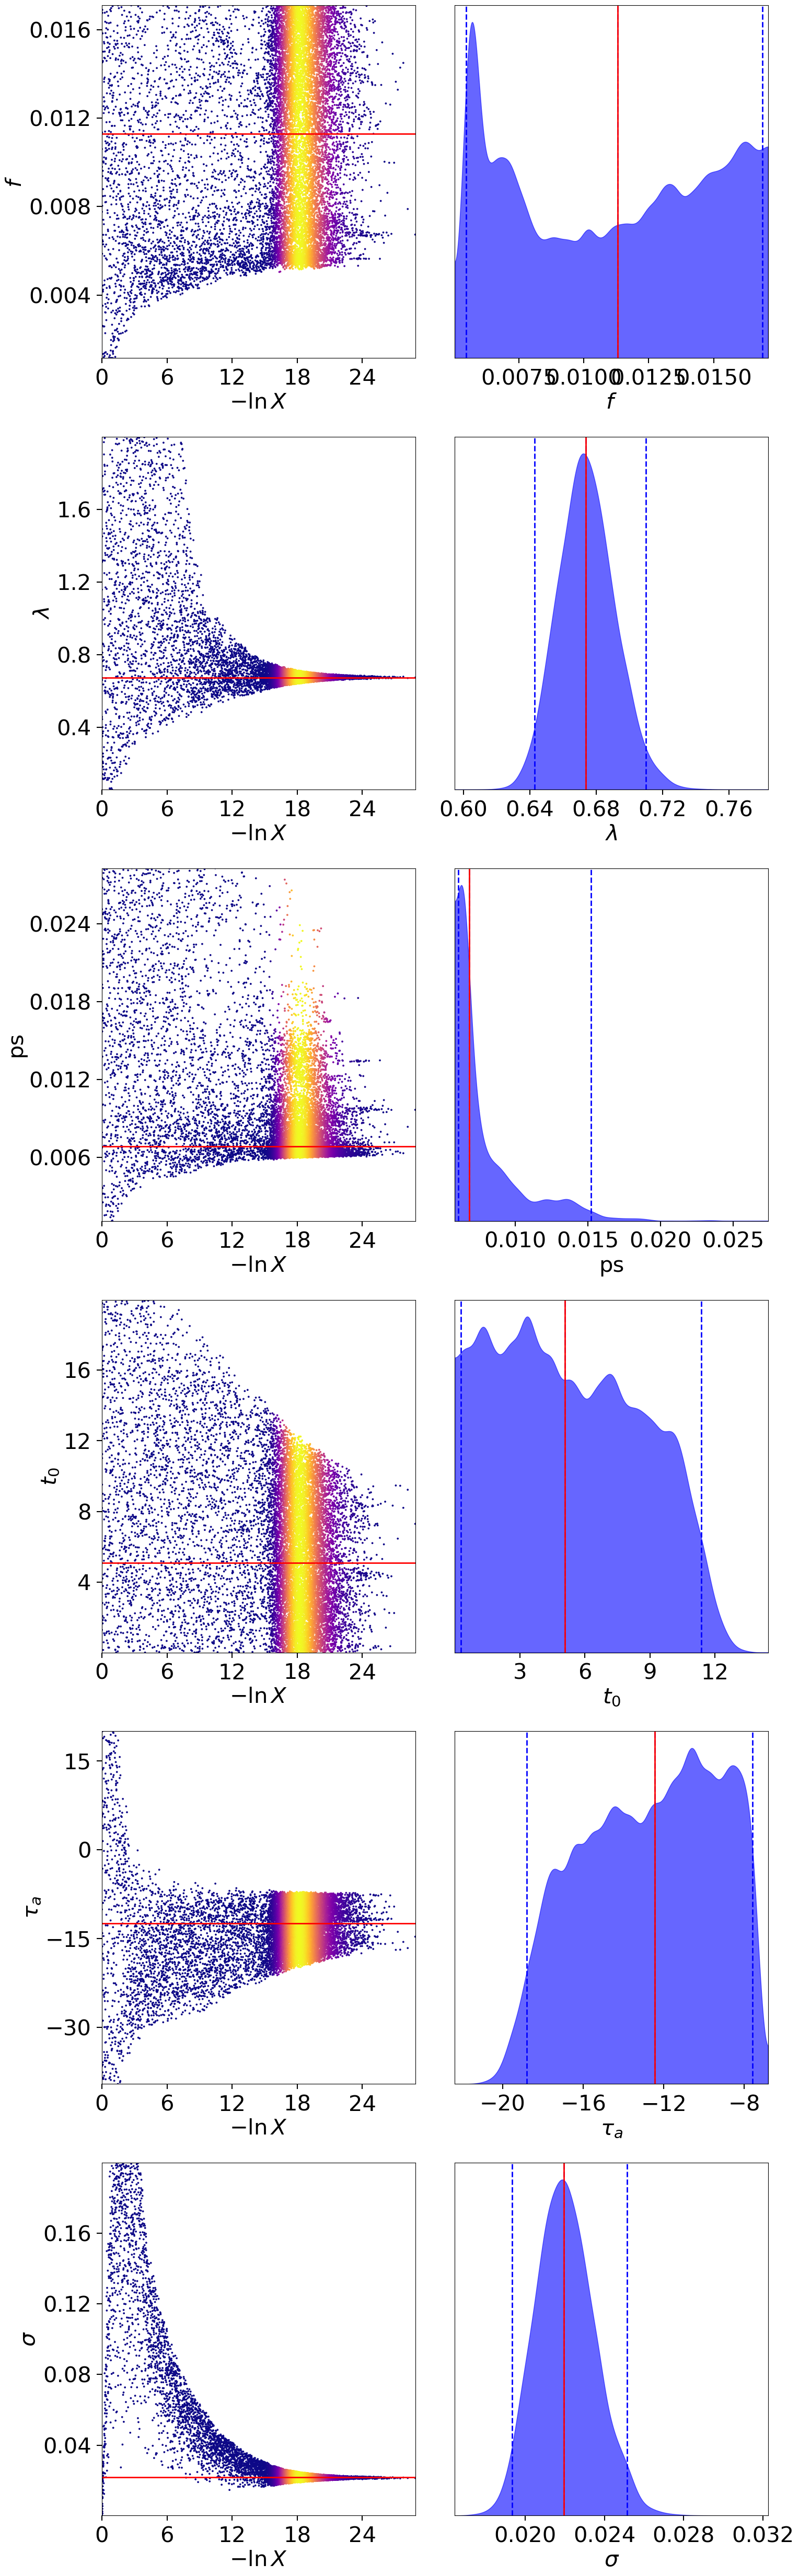

In [7]:
# de novo, thalamus ~ 10
res_twil = mm_twil.run_nested_for_indexed_tac(10, print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_twil.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

## Inspect Raichle1983Model idif

In [8]:
v = mm_idif.truths
pprint("===================================== v ======================================")
pprint(v)

data = mm_idif.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.0079, 0.898, 0.0218, 0, 0, 0.05]
'==================================== data ===================================='
{'halflife': 122.2416,
 'inputFuncInterp': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.38507485,
        5.93364101, 11.28340165, 14.68428297, 16.26475923, 16.34091297,
       15.31887653, 13.60832676, 11.56587747,  9.46690121,  7.49952256,
        5.77317174,  4.46412972,  3.55488578,  2.85720494,  2.33090113,
        1.9516415 ,  1.68832731,  1.51140747,  1.39589359,  1.32213426,
        1.27550046,  1.24559746,  1.22534979,  1.21014393,  1.19710924,
        1.18455849,  1.17157653,  1.15773111,  1.14287828,  1.1270362 ,
        1.11030645,  1.09282677,  1.07474412,  1.05620049,  1.03732591,
        1.01823582,  0.99903073,  0.979

In [9]:
pprint("============================== mm_idif.data2t(data) ===============================")
pprint(mm_idif.data2t(data))
pprint("============================= mm_idif.data2taus(data) =============================")
pprint(mm_idif.data2taus(data))
pprint("=========================== mm_idif.data2timesMid(data) ===========================")
pprint(mm_idif.data2timesMid(data))
pprint("================================== mm_idif.fqfp ===================================")
pprint(mm_idif.fqfp)
pprint("========================== mm_idif.input_function() =========================")
pprint(mm_idif.input_function())
pprint("================================= mm_idif.labels ==================================")
pprint(mm_idif.labels)
pprint("====================== mm_idif.load_nii(mm_idif.fqfp + '.nii.gz') ======================")
pprint(mm_idif.load_nii(mm_idif.fqfp + ".nii.gz"))
pprint("=============================== mm_idif.loglike(v) ================================")
pprint(mm_idif.loglike(v))
pprint("================================== mm_idif.ndim ===================================")
pprint(mm_idif.ndim)
pprint("========================= mm_idif.parse_halflife(mm_idif.fqfp) =========================")
pprint(mm_idif.parse_halflife(mm_idif.fqfp))
pprint("========================= mm_idif.parse_isotope(mm_idif.fqfp) ==========================")
pprint(mm_idif.parse_isotope(mm_idif.fqfp))
pprint("================================== mm_idif.sigma ==================================")
pprint(mm_idif.sigma)
pprint("============================ mm_idif.signalmodel(data) ============================")
pprint(mm_idif.signalmodel(data))

('============================== mm_idif.data2t(data) '
 '===============================')
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118.])
('============================= mm_idif.data2taus(data) '
 '=============================')
array([10., 10., 10., 10

## Plot Raichle1983Model idif

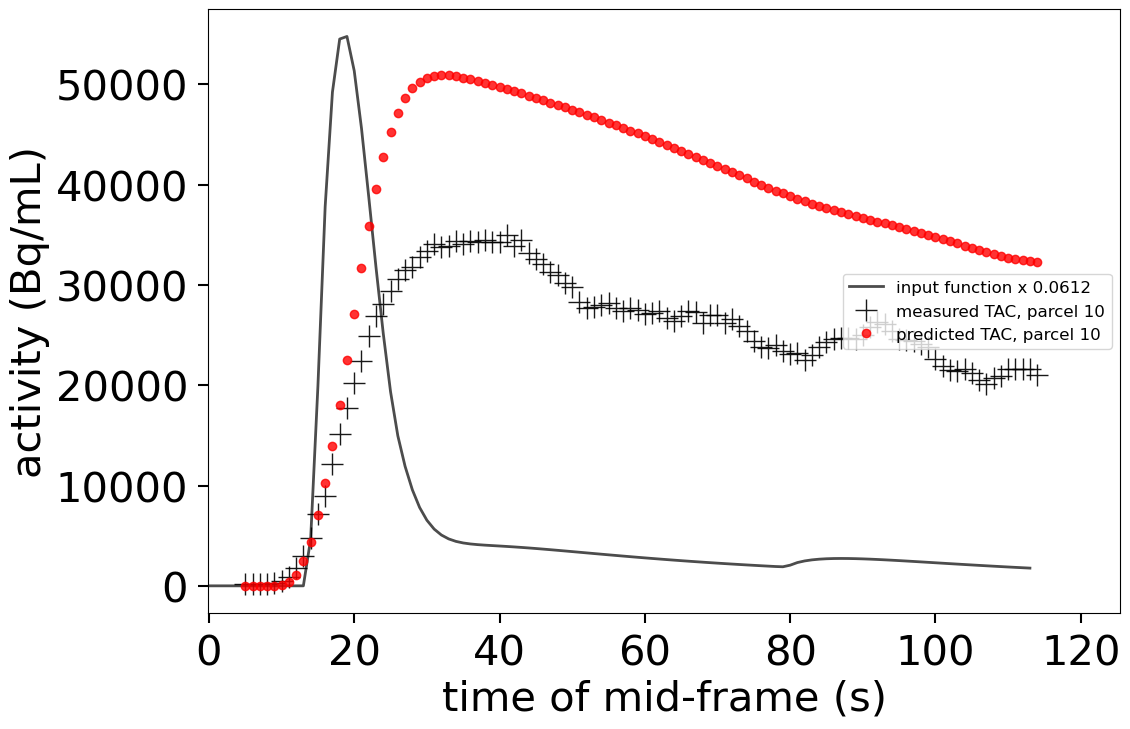

In [10]:
mm_idif.plot_truths(parc_index=10)

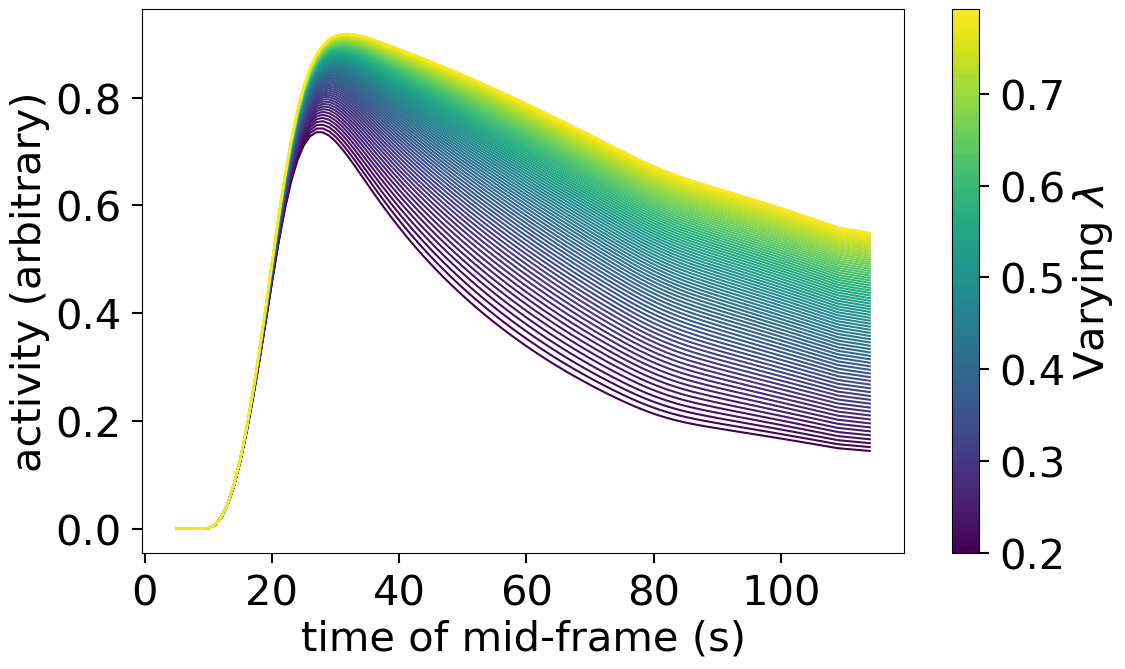

In [11]:
mm_idif.plot_variations(1, 0.2, 0.8 , mm_idif.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [ ]:
# de novo, thalamus ~ 10
res_idif = mm_idif.run_nested_for_indexed_tac(10, print_progress=True)

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_idif.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

iter: 11938 | batch: 17 | bound: 43 | nc: 1 | ncall: 615474 | eff(%):  1.940 | loglstar:   -inf < 255.542 < 254.405 | logz: 237.735 +/-  0.152 | stop:  1.312                                         